In [15]:
import pandas as pd

In [16]:
energy_consumption = pd.read_table("intel_energy.txt", delim_whitespace=True, header=0, na_values=-1)
energy_consumption.head()

/home/sgeorgiou/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Client gRPC,Client RPC,Client Rest,Server gRPC,Server RPC,Server Rest
0,65.60,399.90,1206.70,105.25,364.00,789.45
1,99.05,84.85,201.45,105.90,70.45,79.65
2,451.50,22911.50,687.15,364.45,20402.50,617.85
3,28.20,36.25,88.15,27.00,32.35,31.45
4,11543.90,930.60,7003.00,1291.40,1214.65,20574.50


In [17]:
energy_consumption.describe()

,Client gRPC,Client RPC,Client Rest,Server gRPC,Server RPC,Server Rest
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1847.771429,3583.157143,1687.407143,363.478571,3277.807143,3321.764286
std,4281.124309,8527.991489,2430.590803,456.282726,7561.437572,7614.060821
min,28.200000,36.250000,88.150000,27.000000,32.350000,31.450000
25%,82.325000,202.250000,419.250000,83.425000,208.750000,224.900000
50%,139.400000,399.350000,687.150000,105.900000,364.000000,617.850000
75%,529.125000,665.250000,1597.525000,476.600000,864.150000,789.375000
max,11543.900000,22911.500000,7003.000000,1291.400000,20402.500000,20574.500000


In [18]:
energy_consumption.quantile([0.05, 0.95])

,Client gRPC,Client RPC,Client Rest,Server gRPC,Server RPC,Server Rest
0.05,39.420,50.83,122.140,37.380,43.780,45.910
0.95,8262.755,16317.23,5498.605,1080.605,14646.145,14638.985


In [19]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, h, m-h, m+h

In [20]:
energy_consumption.apply(lambda x: mean_confidence_interval(x.dropna()), axis=0)

Client gRPC    (1847.7714285714285, 3959.379611835017, -2111....
Client RPC     (3583.157142857143, 7887.076662332869, -4303.9...
Client Rest    (1687.4071428571428, 2247.9215676517533, -560....
Server gRPC    (363.4785714285714, 421.99113843005154, -58.51...
Server RPC     (3277.807142857143, 6993.163383223029, -3715.3...
Server Rest    (3321.764285714286, 7041.831771047912, -3720.0...
dtype: object

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
melted_df = energy_consumption.melt(var_name ='Protocols', value_name ='Energy consumption (in Joules)')
melted_df.head()

,Protocols,Energy consumption (in Joules)
0,Client gRPC,65.60
1,Client gRPC,99.05
2,Client gRPC,451.50
3,Client gRPC,28.20
4,Client gRPC,11543.90


In [23]:
melted_df.rename({1: 'protocols'}, axis='columns', inplace=True)
melted_df.head()

,Protocols,Energy consumption (in Joules)
0,Client gRPC,65.60
1,Client gRPC,99.05
2,Client gRPC,451.50
3,Client gRPC,28.20
4,Client gRPC,11543.90


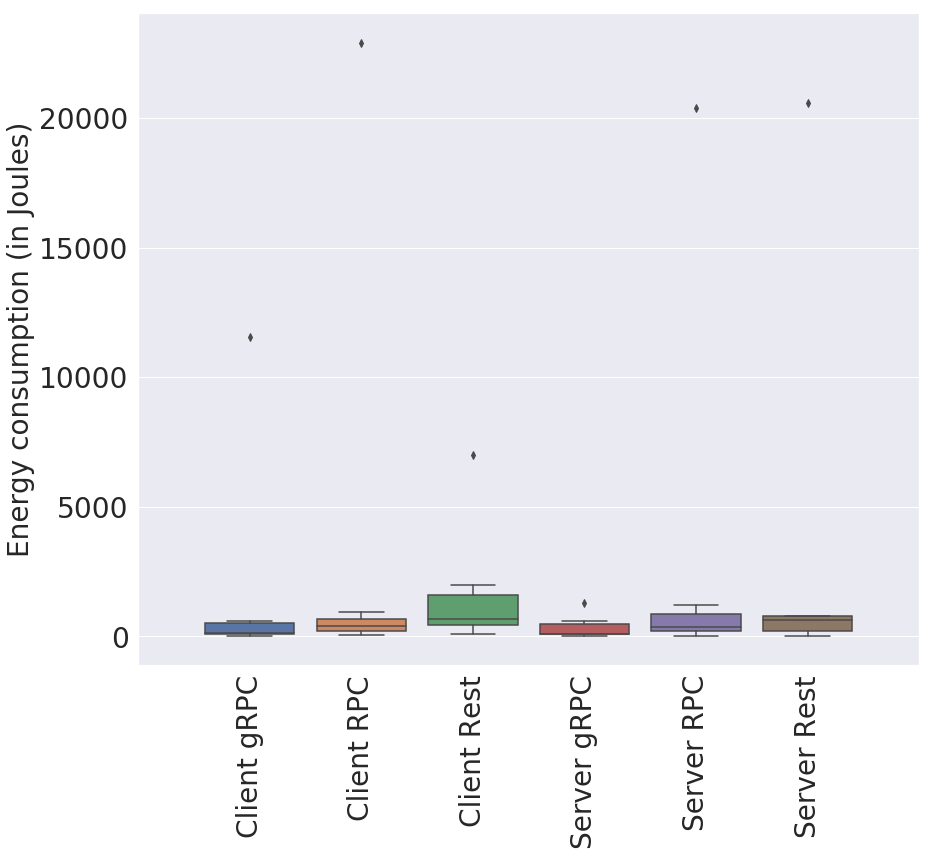

In [25]:
fig, ax = plt.subplots()

sns.set(font_scale=1.5)
fig.set_size_inches(14, 12)
g = sns.boxplot(x="Protocols", y="Energy consumption (in Joules)", data=melted_df, showfliers=True)
ticklabels = g.get_xticklabels()
x_lim = g.get_xlim()

g.set_xlim(x_lim[0] - 0.5, x_lim[1] + 0.5)
_ = g.set_xticklabels(ticklabels, rotation=90)
ax.set_xlabel('')
ax.set_ylabel('Energy consumption (in Joules)',fontsize=28)
ax.tick_params(labelsize=28)
fig.savefig('intel_platforms_energy.pdf', bbox_inches='tight')